In [1]:
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd

import xarray as xr


In [2]:
CLT_t_ = [ 200 ] # 0 , 220, 240, 260, 280, 300] # 160, 
GL_b_ = [360, 400, 420, 440] #, 480, 500, 520, 540, 560, 580, 600 ] # 280, 320, 340, 360, 380, 
GL_h_ = [ 360, 400, 440, 480, 520, 560, 600, 640, 680, 720, 760, 800 ] # 320, 360, 400,

Price_factor_GL = 2 # Price Glulam / Price CLT per volume of material

In [23]:
# Section Geometry
bTimber = 900 # base of the timber member
hTimber = 900 # hight of the timber member

areaTimber = bTimber * hTimber # Area of timber member

# Steel plates
nSteelPlt = 4 # Number of steel plates
tSteelPlt = 20 # Plate thickness
ccSteelPlt = 150 # centre to centre spacing between steel plates 


lengthSteelFireProtect = 100 # thickness for fire protection of steel plate

gapPlt = 2 # [mm] toleance gap between steel plate and timber

areaSlot = ( 2*gapPlt + tSteelPlt ) * nSteelPlt * bTimber # Cut on Timber section to allow for Steel plates

# Dowels
dDowel = 16 # Diameter of the dowel
lDowel = 600 # Length of the dowel
nDowelsX = 10 # number of dowels along dir X
nDowelsY = 6 # numer of dowels alonf dir Y
lTimberPlugh = 100 # depth of timber plug
dTimberPlugh = 50 # diameter of timber plug

spacingDowelX = 0
if nDowelsX>1: 
    spacingDowelX = (bTimber - 2*(lengthSteelFireProtect+2*dDowel))/(nDowelsX-1)
print(spacingDowelX)


spacingDowelY =  200
print(spacingDowelY)

if nSteelPlt >1:
    ccSteelPltMax = (hTimber - 2 * lTimberPlugh - 6 * dDowel) / (nSteelPlt-1)
    if ccSteelPlt>ccSteelPltMax:
        print('\n Centre to centre spacing between steel plates too big. Maximum c/c assumed', ccSteelPltMax )
    
        ccSteelPlt = ccSteelPltMax



dowelEndDistParlGrainLoaded = dDowel * 6
dowelEndDistParlGrainUnload = dDowel * 5

dowelEndDistPerpGrainLoaded = dDowel * 6
dowelEndDistPerpGrainUnload = dDowel * 6

dowelEdgeDistPerpGrainLoaded = dDowel * 6
dowelEdgeDistPerpGrainUnload = dDowel * 4



areaDowelCut = nDowelsX * dDowel * (hTimber - nSteelPlt * (tSteelPlt + 2 * gapPlt))

areaTimberNet = areaTimber - areaSlot - areaDowelCut


print('\nArea Timber = ',areaTimber, '| Net Area Timber = ', areaTimberNet, 
      '| % Net Area Timber = ', areaTimberNet/areaTimber)

areaTimberNet**0.5

# Stiffness of the Connection

roTimber = 420 # [kg] Density of timber
slipModulusDowelsSteelPLt = 2 * roTimber**1.5/23  # Kser Dowels to steel plate connections
slipModulusDowelsSteelPLtGroup = slipModulusDowelsSteelPLt * nSteelPlt * nDowelsX * nDowelsY

print(f'\nkser_1dowel = {slipModulusDowelsSteelPLt :.2f} Nmm')

print(f'kser_GroupDowel = {slipModulusDowelsSteelPLtGroup :.2f} Nmm')


70.66666666666667
200

Area Timber =  810000 | Net Area Timber =  594960 | % Net Area Timber =  0.7345185185185186

kser_1dowel = 748.47 Nmm
kser_GroupDowel = 179633.50 Nmm


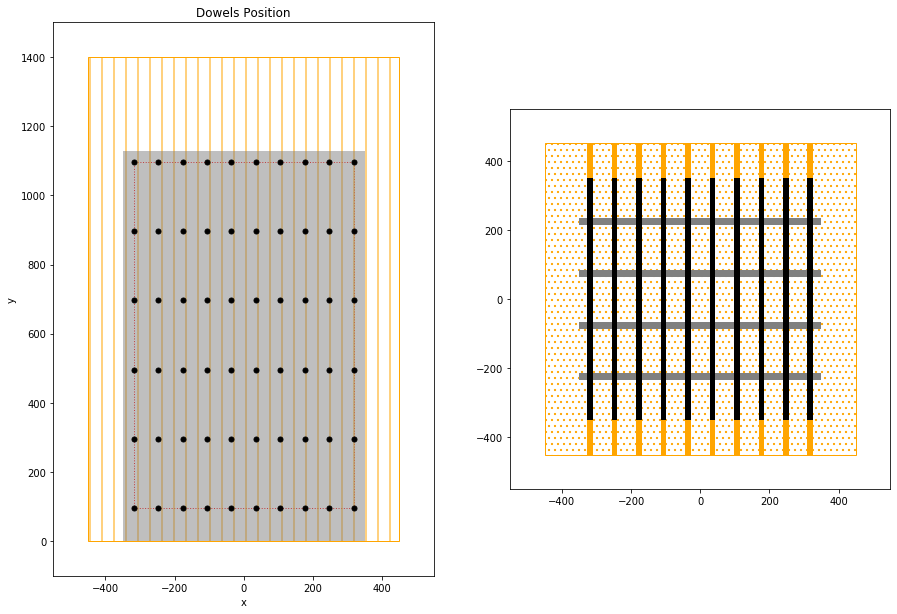

In [10]:
# Print dowel group


#dowelMatrix = np.ones((nDowelsX, nDowelsY)) * np.arange(nDowelsY)

dowelMatrix = np.array([[i, j] for i in np.arange(0, nDowelsX) * spacingDowelX - (nDowelsX-1)/2 * spacingDowelX 
                                                  for j in np.arange(0, nDowelsY) * spacingDowelY+dowelEndDistParlGrainLoaded ])



# plt.plot(dowelMatrix[:,0], dowelMatrix[:,1],  '+', color='black')

from matplotlib.patches import Rectangle
fig, axs = plt.subplots(1,2,figsize=(15,15))

axs[0].set_aspect('equal', adjustable='box')

axs[0].plot(dowelMatrix[:,0], dowelMatrix[:,1],  '.', color='black', markersize='10')

# ax.add_patch( Rectangle((2, 4),
#                         5, 6,
#                         fc='none',
#                         color ='yellow',
#                         linewidth = 5,
#                         linestyle="dotted") )
dowelGroupLengthX = spacingDowelX * (nDowelsX-1)
dowelGroupLengthY = spacingDowelY * (nDowelsY-1)

SteelPltDimX = bTimber - 2 * lengthSteelFireProtect
SteelPltDimY = dowelEndDistParlGrainLoaded + dowelGroupLengthY + 2 * dDowel


axs[0].add_patch(Rectangle((-dowelGroupLengthX/2, dowelEndDistParlGrainLoaded),dowelGroupLengthX, dowelGroupLengthY,
                        fc='none', color="red", linestyle="dotted"))
# - Timber Front View
axs[0].add_patch(Rectangle((-bTimber/2, 0), bTimber, dowelGroupLengthY+400,
                        hatch="|", fc='none', color="orange", linestyle="-"))
# - Steel plates
axs[0].add_patch(Rectangle((-SteelPltDimX/2, 0 ), 
                             SteelPltDimX, SteelPltDimY, 
                              fc='gray', color="none", linestyle="-", alpha = 0.5))


# ax.plot([0,dowelGroupLengthX],[0, dowelGroupLengthY],ls="--",c="b")
# ax.fill_between([0,dowelGroupLengthX],[0, dowelGroupLengthY], facecolor="none", hatch="X", 
#                 edgecolor="b", linewidth=1.0, linestyle ="dotted")


axs[0].set_title('Dowels Position')
axs[0].set_xlabel('x')
axs[0].set_ylabel('y')
# plt.axis('off')

axs[0].set_xlim(-100-bTimber/2, bTimber/2+100)
axs[0].set_ylim(-100, dowelGroupLengthY+500)



# PALN VIEW
axs[1].set_aspect('equal', adjustable='box')
# - Timber Cross Section
axs[1].add_patch(Rectangle((-bTimber/2, -hTimber/2 ), bTimber, hTimber,
                        hatch="..", fc='none', color="orange", linestyle="-"))
# - Steel plates
[ axs[1].add_patch(Rectangle((-bTimber/2 + lengthSteelFireProtect, (-(nSteelPlt-1)/2+i)*ccSteelPlt -tSteelPlt/2) , 
                             bTimber- 2* lengthSteelFireProtect, tSteelPlt, 
                              fc='gray', color="none", linestyle="-")) for i in np.arange(0, nSteelPlt) ]
# - Dowels
[ axs[1].add_patch(Rectangle(( (-(nDowelsX-1)/2+i)*spacingDowelX - dDowel/2, -hTimber/2+ lTimberPlugh) ,
                            dDowel, hTimber-2*lTimberPlugh,
                            fc='black', color="none", linestyle="-")) for i in np.arange(0, nDowelsX) ]

# - Timber plugs dowels
[ axs[1].add_patch(Rectangle(( (-(nDowelsX-1)/2+i)*spacingDowelX- dDowel/2, -hTimber/2) ,
                            dDowel, lTimberPlugh,
                            fc='orange', color="none", linestyle="-")) for i in np.arange(0, nDowelsX) ]
[ axs[1].add_patch(Rectangle(( (-(nDowelsX-1)/2+i)*spacingDowelX- dDowel/2, hTimber/2-lTimberPlugh) ,
                            dDowel, lTimberPlugh,
                            fc='orange', color="none", linestyle="-")) for i in np.arange(0, nDowelsX) ]




axs[1].set_xlim(-100 - bTimber/2, bTimber/2 + 100)
axs[1].set_ylim(-100 - hTimber/2, hTimber/2 + 100)

plt.show()


# np.dot(np.ones(nDowelsX), np.array([[3, 4]]))

# bbbb= np.repeat(a = np.arange(nDowelsX), repeats = 2, axis = 0)
# bbbb

In [ ]:
# Frame Geometry
L_X = 35000
L_Y = 7560*5 # 40000 7560

# N_X = np.array([3,4,5,6,7,8,9]) # Number of bays in X direction
# N_Y = np.array([5]) # ,5,6,7,8,9,10 # Number of bays in Y direction

Dx = 1000*np.concatenate((np.array([2, 3]), np.arange(4,10.1,0.2)))
Dy = np.array([7560])  # 1000*np.arange(3,9,0.5) # np.array([6000]) 

N_X = L_X / Dx  # Number of bays in X direction
N_Y = L_Y / Dy  # Number of bays in Y direction


Dx = L_X/(N_X)
Dy = L_Y/(N_Y)

In [ ]:
# Loads
q_DL_d = 2 # kN/m^2
q_LL_d = 2.55 # kN/m^2
q_DL_facade = 2 # kN/m

In [ ]:
# Load coefficients
#ULS
gamma_ULS_DL = 1.35
gamma_ULS_LL_A = 1.5

Psi_LL_B = [0.7, 0.5, 0.3]
#SLS - characteristic/rare

gamma_SLSc_DL = 1.0
gamma_SLSc_LL_A = 1.0

#SLS - Quasi permanent
gamma_SLSqp_DL = 1.0
gamma_SLSqp_LL_A = 1.0

#SLS - Frequent
gamma_SLSf_DL = 1.0
gamma_SLSf_LL_A = 1.0

# Material

In [ ]:
# Material 

# CLT
Mat_01 = 'GL24h'
fm_k = 24 # MPa
ft_0_k = 14 # MPa
ft_90_k = 0.12 # MPa
fc_0_k = 21 # MPa
fc_90_k = 2.5 # MPa
fv_k = 4 # MPa
Em_0_mean = 12000 # MPa
#Em_90_mean = 1
#Em_0_mean = 1
G_mean = 690 # MPa


# Glulam GL24h
GL24h = {
"fm_k" : 24 , # MPa,
"ft_0_k" : 19.2, # MPa
"ft_90_k" : 0.5 ,# MPa
"fc_0_k" : 24 , # MPa
"fc_90_k" : 2.5 , # MPa
"fv_k" : 3.5 , # MPa
"Em_0_mean" : 11500 , # MPa
#Em_90_mean = 1
#Em_0_mean = 1
"G_mean" : 650
}

gamma_m_CLT = 1.3
k_mod_CLT = 0.8 # K_mod for CLT in service class 1 = 0.8
k_mod_GL = 0.8 


# Section properties

In [ ]:
# Section properties
# CLT
# A_net mm^2 Net Area of CLT section 
# A_tot mm^2 Total Area of CLT section  
# I_net mm^4 moment od inertia net section
# I_tot mm^4 moment of inertia total section

CLT_properties = pd.DataFrame(columns= ['Name', 'thk', 'A_net', 'A_tot' , 'I_net', 'I_tot'])

CLT_properties.loc[0] = [ 'CLT 160 L5s', 160, 120000, 160000, 304000000, 341333300 ]
CLT_properties.loc[1] = [ 'CLT 180 L5s', 180, 120000, 180000, 408000000, 486000100 ]
CLT_properties.loc[2] = [ 'CLT 200 L5s', 200, 120000, 200000, 527999900, 666666700 ]
CLT_properties.loc[3] = [ 'CLT 220 L7s - 2', 220, 160000, 220000, 809333300, 887333400 ]
CLT_properties.loc[4] = [ 'CLT 240 L5s - 2', 240, 200000, 240000, 1114666000, 1152000000 ]
CLT_properties.loc[5] = [ 'CLT 260 L5s - 2', 260, 200000, 260000, 1386666000, 1464666000   ]
CLT_properties.loc[6] = [ 'CLT 280 L7s - 2', 280, 200000, 280000, 1690666000, 1829333000 ]
CLT_properties.loc[7] = [ 'CLT 300 L7s - 2', 300, 240000, 300000, 2063999000, 2250000000  ]
CLT_properties = CLT_properties.set_index('thk')                      

E_CLT_i = Em_0_mean


# Glulam
# b_GL_i = 400
# h_GL_i = 680

# A_GL_i = b_GL_i * h_GL_i

# I_GL_y_i = 1/12 * b_GL_i * h_GL_i**3 # mm^4 moment od inertia about y axis
# I_GL_z_i = 1/12 * h_GL_i * b_GL_i**3 # mm^4 moment od inertia about z axis


# E_CLT_i = Em_0_mean

In [ ]:
CLT_properties['I_net'][180]

In [ ]:
def w_2span_unifLoad(E_, I_, L_, q_):
    E = E_
    I = I_
    L = L_
    q = q_
    
    return  0.0092 * q * L**4 / (E*I) # 1 / 185 * q * L**4 / (E*I) 
    
def w_1span_unifLoad(E_, I_, L_, q_):
    E = E_
    I = I_
    L = L_
    q = q_
    
    return  5 / 384 * q * L**4 / (E*I) 

In [ ]:
dict = ["Dx" , "Dy", "t_CLT" , "GL_b" , "GL_h" , "w_fin" ,"Volume_Timber" ]

pd.options.display.float_format = ' {:.2f}'.format
#pd.set_option('colheader_justify', 'center')


#from IPython.display import HTML

Data_Set = pd.DataFrame(columns=dict)

# Volume_Matrix.style.set_properties(**{'align': 'center'})

#pd.DataFrame(dict).xs['Volume_Timber',0] 

#left_aligned_df = pd.DataFrame(dict).style.set_properties(**{'text-align': 'center'})
#display(left_aligned_df)
# 
# Matrix_CLT_thick = pd.DataFrame({'t_CLT':t_CLT[0], 'Volume_': [Data_Set] } ).set_index('t_CLT')


In [ ]:
#Volume_Matrix.loc[ii,'Volume_Timber'] = 10
# Matrix_CLT_thick.loc[160,'Volume_']

In [ ]:
# Deflections check
# w_123 = w1+w2+w3
Data_Set = pd.DataFrame(columns=dict)

Data_Set_Null = pd.DataFrame(columns=dict)

Data_Set_i = Data_Set_Null
zz = 0
kk = 0
for ii_N_X in N_X:
    ii_Dx = L_X/(ii_N_X)
    for ii_N_Y in N_Y:
        ii_Dy = L_Y/(ii_N_Y)
        for tt_CLT_i in CLT_t_:
            
            for ii_GL_b in GL_b_:
                for  ii_GL_h in GL_h_:

                    Data_Set_i = Data_Set_Null
        #            for ii in range(0,len(N_X)):

                    Data_Set_i.loc[kk,'Dx'] = ii_Dx
                    Data_Set_i.loc[kk,'Dy'] = ii_Dy
                    Data_Set_i.loc[kk,'t_CLT'] = tt_CLT_i
                    Data_Set_i.loc[kk,'GL_b'] = ii_GL_b
                    Data_Set_i.loc[kk,'GL_h'] = ii_GL_h
                


            #         t_CLT_i = t_CLT_i
                    E_CLT_i = E_CLT_i
                    I_CLT_i = CLT_properties['I_net'][tt_CLT_i]
                    L_CLT_i = ii_Dx


                    q_CLT_i = ( q_DL_d * gamma_SLSc_DL + q_LL_d * gamma_SLSc_LL_A ) * 1000 / 10**6 * 1000 # N/mm^2

                    w_CLT = w_2span_unifLoad(E_CLT_i, I_CLT_i, L_CLT_i, q_CLT_i) / k_mod_CLT  # mm - Deflection CLT, units in N, mm

                    E_GL_i = GL24h["Em_0_mean"]
                    
                    
                    I_GL_y_i = 1/12 * ii_GL_b * ii_GL_h**3 # mm^4 moment od inertia about y axis
                    
                    L_GL_i = ii_Dy
                    q_GL_i = 10/8 * q_CLT_i/1000 * L_CLT_i

                    # Deflection limit
                    L_defl = (L_CLT_i**2 + L_GL_i**2)**0.5
                    w_lim_tot = L_defl / 333 
                    w_lim_CLT = L_CLT_i / 333
                    w_lim_GL = L_GL_i / 333
                        
                    

                    w_GL_1 = w_1span_unifLoad(E_GL_i, I_GL_y_i, L_GL_i, q_GL_i) / k_mod_GL # mm - Deflection od Glulam beam, units in N, mm


                    Data_Set_i.loc[kk,'w_fin'] = w_CLT + w_GL_1



                    if w_CLT+w_GL_1 < w_lim_tot and w_CLT < w_lim_CLT and w_GL_1 < w_lim_GL:    

                        # Volume

                        Vol_CLT = tt_CLT_i * L_X * L_Y / 10**9 / (L_X * L_Y / 10**6) # m^3 Volume of CLT per floor
                        Vol_GL_1 = Price_factor_GL * ii_N_X * ii_GL_b * ii_GL_h * L_Y / 10**9 / (L_X * L_Y / 10**6) # m^3 Volume of Glulam per floor

                        Data_Set_i.loc[kk,'Volume_Timber'] = Vol_CLT + Vol_GL_1

                    else : 
                        Data_Set_i.loc[kk,'Volume_Timber'] = np.nan
                        
                    Data_Set = pd.concat([Data_Set, Data_Set_i])
                    
                    zz = zz + 1


Data_Set = Data_Set.set_index(np.array(range(0,zz)))

In [ ]:
# plot data
# fig = plt.figure()
# ax = fig.add_subplot(111)

fig, ax1 = plt.subplots(figsize=(15,15))

# use unstack()
CLT_plt = Data_Set.groupby(['Dx','t_CLT'])['Volume_Timber'].min().unstack().plot(ax=ax1,colormap='cividis',  zorder=0) # viridis
# leg1 = ax1.legend(loc='upper left',title = "t_CLT", bbox_to_anchor=(1.01, 1))
ax1.legend(loc='upper left',title = "t_CLT",bbox_to_anchor=(1.01, 1))
ax1.set_ylim([Data_Set['Volume_Timber'].min()*0.95,Data_Set['Volume_Timber'].max() ])





# # Add labels next to plot lines

# ys = Data_Set.groupby(['Dx','t_CLT'])['Volume_Timber'].min().unstack().iloc[0,:].values
# xs = Dx[-1]*np.ones(len(ys))

# for i in range(len(ys)):
    
#     yl = Data_Set.groupby(['Dx','t_CLT'])['Volume_Timber'].min().unstack().iloc[0:2,i].values
#     xl = Data_Set.groupby(['Dx','t_CLT'])['Volume_Timber'].min().unstack().index[0:2].values
    
#     xylabel = ((xl[0]+xl[1])/2, (yl[0]+yl[1])/2)
    
#     label = 'CLT '+ str(Data_Set.groupby(['Dx','t_CLT'])['Volume_Timber'].min().unstack().iloc[0,:].index.values[i])

#     p1 = ax1.transData.transform_point((xl[0], yl[0]))
#     p2 = ax1.transData.transform_point((xl[1], yl[1]))
#     dy = (p2[1] - p1[1])
#     dx = (p2[0] - p1[0])
#     rotn = np.degrees(np.arctan2(dy, dx))
#     ax1.annotate(label, xy=xylabel, ha='right', va='center', rotation=rotn, color=plt.gca().lines[i].get_color(), \
#                  backgroundcolor="w" , zorder=0)
    
#     plt.annotate(label, # this is the text
#                  (x,y), # this is the point to label
#                  textcoords="offset points", # how to position the text
#                  xytext=(-5,0), # distance from text to points (x,y)
#                  va="center",  # vertical alignment can be left, right or center 
#                  ha='right') # horizontal alignment can be left, right or center               
#     i = i+1


ax2 = ax1.twinx()
GL_h_plt = Data_Set.groupby(['Dx','GL_h'])['Volume_Timber'].min().unstack().plot(ax=ax2,colormap='cool', linestyle ='-.',  zorder=0 )
ax2.legend(loc='upper left',title = "GL_h",bbox_to_anchor=(1.09, 1))
ax2.set_ylim(ax1.get_ylim())
ax2.axes.get_yaxis().set_visible(False)




# Add labels next to plot lines

ys = Data_Set.groupby(['Dx','GL_h'])['Volume_Timber'].min().unstack().iloc[0,:].values
xs = Dx[-1]*np.ones(len(ys))

for i in range(len(ys)):
    
    yl = Data_Set.groupby(['Dx','GL_h'])['Volume_Timber'].min().unstack().iloc[0:2,i].values
    xl = Data_Set.groupby(['Dx','GL_h'])['Volume_Timber'].min().unstack().index[0:2].values
    
    xylabel = ((xl[0]+xl[1])/2, (yl[0]+yl[1])/2)
    
    label = 'GB_h_'+ str(Data_Set.groupby(['Dx','GL_h'])['Volume_Timber'].min().unstack().iloc[0,:].index.values[i])

    p1 = ax2.transData.transform_point((xl[0], yl[0]))
    p2 = ax2.transData.transform_point((xl[1], yl[1]))
    dy = (p2[1] - p1[1])
    dx = (p2[0] - p1[0])
    rotn = np.degrees(np.arctan2(dy, dx))
    ax2.annotate(label, xy=xylabel, ha='center', va='bottom', rotation=rotn, color=plt.gca().lines[i].get_color(), \
                 backgroundcolor="w" , zorder=10)
                  
    i = i+1
# i = 0
# for x,y in zip(xs,ys):

#     label = 'CLT '+ str(Data_Set.groupby(['Dx','t_CLT'])['Volume_Timber'].min().unstack().iloc[0,:].index.values[i])
    
#     p1 = ax.transData.transform_point((x[0], y[0]))
#     p2 = ax.transData.transform_point((x[1], y[1]))
#     dy = (p2[1] - p1[1])
#     dx = (p2[0] - p1[0])
#     rotn = np.degrees(np.arctan2(dy, dx))
#     ax.annotate(label, xy=xylabel, ha='center', va='center', rotation=rotn, color = l.get_color(), backgroundcolor="w" )

    
#     plt.annotate(label, # this is the text
#                  (x,y), # this is the point to label
#                  textcoords="offset points", # how to position the text
#                  xytext=(-5,0), # distance from text to points (x,y)
#                  va="center",  # vertical alignment can be left, right or center 
#                  ha='right') # horizontal alignment can be left, right or center 
                
#     i = i+1
    
    


ax3 = ax1.twinx()
GL_b_plt = Data_Set.groupby(['Dx','GL_b'])['Volume_Timber'].min().unstack().plot(ax=ax3,colormap='copper', \
                                                                                 linestyle =':' , zorder=1)
ax3.legend(loc='upper left',title = "GL_b",bbox_to_anchor=(1.18, 1))
ax3.set_ylim(ax1.get_ylim())
ax3.axes.get_yaxis().set_visible(False)


# Add labels next to plot lines

ys = Data_Set.groupby(['Dx','GL_b'])['Volume_Timber'].min().unstack().iloc[-1,:].values
xs = Dx[-1]*np.ones(len(ys))

for i in range(len(ys)):
    
#     yl = Data_Set.groupby(['Dx','GL_b'])['Volume_Timber'].min().unstack().dropna().iloc[-2:,i].values
#     xl = Data_Set.groupby(['Dx','GL_b'])['Volume_Timber'].min().unstack().dropna().index[-2:].values

#     pp = int(len(Dx)/3+1)
    yl = Data_Set.groupby(['Dx','GL_b'])['Volume_Timber'].min().unstack().dropna().iloc[0:2,i].values
    xl = Data_Set.groupby(['Dx','GL_b'])['Volume_Timber'].min().unstack().dropna().index[0:2].values
    
#     xylabel = ((xl[0]+xl[1])/2, (yl[0]+yl[1])/2)
    xylabel = ((xl[0]), (yl[0]))
    
    label = 'GB_b_'+ str(Data_Set.groupby(['Dx','GL_b'])['Volume_Timber'].min().unstack().iloc[0,:].index.values[i])

    p1 = ax3.transData.transform_point((xl[0], yl[0]))
    p2 = ax3.transData.transform_point((xl[1], yl[1]))
    dy = (p2[1] - p1[1])
    dx = (p2[0] - p1[0])
    rotn = 0 # np.degrees(np.arctan2(dy, dx))
    ax3.annotate(label, xy=xylabel, ha='right', va='center', rotation=rotn, color=plt.gca().lines[i].get_color(), \
                 backgroundcolor="w" , zorder=0)
                  
    i = i+1

ax1.grid()


# ax4 = ax1.twinx()
# Data_Set.plot(kind='scatter',x='Dx',y='Volume_Timber',c='t_CLT', ax=ax4, colormap='viridis',figsize=(10,4), sharex=False)
# ax4.set_ylim(ax1.get_ylim())
# ax4.axes.get_yaxis().set_visible(False)

In [ ]:
Data_Set.groupby(['Dx','GL_b'])['Volume_Timber'].min().unstack().iloc[0,:].values
i = 0
for x,y in zip(xs,ys):
    yl = Data_Set.groupby(['Dx','GL_b'])['Volume_Timber'].min().unstack().dropna().iloc[-2:,i].values
    xl = Data_Set.groupby(['Dx','GL_b'])['Volume_Timber'].min().unstack().dropna().index[-2:].values
    i = i + 1 
    print(i,  xl, yl )    

In [ ]:
Data_Set.groupby(['Dx','GL_h'])['Volume_Timber'].min().unstack()

In [ ]:
Data_Set.groupby(['Dx','GL_b'])['Volume_Timber'].min().unstack()

In [ ]:
Data_Set.plot(kind='scatter',x='Dx',y='w_fin',c='t_CLT', colormap='viridis',figsize=(10,4), sharex=False)
plt.show()

print(ax1.get_ylim)

In [ ]:
# plot data
# fig = plt.figure()
# ax = fig.add_subplot(111)
fig, ax1 = plt.subplots(figsize=(15,5))

# use unstack()
CLT_plt = Data_Set.groupby(['Dx','t_CLT'])['w_fin'].min().unstack().plot(ax=ax1,colormap='cividis') # viridis
# leg1 = ax1.legend(loc='upper left',title = "t_CLT", bbox_to_anchor=(1.01, 1))
ax1.legend(loc='upper left',title = "t_CLT",bbox_to_anchor=(1.01, 1))

ys = Data_Set.groupby(['Dx','t_CLT'])['w_fin'].min().unstack().iloc[0,:].values
xs = Dx[-1]*np.ones(len(ys))


# Add labels next to plot lines
i = 0
for x,y in zip(xs,ys):
    
    yl = Data_Set.groupby(['Dx','t_CLT'])['w_fin'].min().unstack().iloc[0:2,i].values
    xl = Data_Set.groupby(['Dx','t_CLT'])['w_fin'].min().unstack().index[0:2].values
    
    xylabel = ((xl[0]+xl[1])/2, (yl[0]+yl[1])/2)
    
    label = 'CLT '+ str(Data_Set.groupby(['Dx','t_CLT'])['w_fin'].min().unstack().iloc[0,:].index.values[i])

    p1 = ax1.transData.transform_point((xl[0], yl[0]))
    p2 = ax1.transData.transform_point((xl[1], yl[1]))
    dy = (p2[1] - p1[1])
    dx = (p2[0] - p1[0])
    rotn = np.degrees(np.arctan2(dy, dx))
    ax1.annotate(label, xy=xylabel, ha='right', va='center', rotation=rotn, color=plt.gca().lines[i].get_color(), \
                 backgroundcolor="w" , zorder=10)
    
#     plt.annotate(label, # this is the text
#                  (x,y), # this is the point to label
#                  textcoords="offset points", # how to position the text
#                  xytext=(-5,0), # distance from text to points (x,y)
#                  va="center",  # vertical alignment can be left, right or center 
#                  ha='right') # horizontal alignment can be left, right or center 
                
    i = i+1


ax2 = ax1.twinx()
GL_h_plt = Data_Set.groupby(['Dx','GL_h'])['w_fin'].min().unstack().plot(ax=ax2,colormap='Reds_r', linestyle ='-.' )
ax2.legend(loc='upper left',title = "GL_h",bbox_to_anchor=(1.09, 1))
ax2.axes.get_yaxis().set_visible(False)


# i = 0
# for x,y in zip(xs,ys):

#     label = 'CLT '+ str(Data_Set.groupby(['Dx','t_CLT'])['Volume_Timber'].min().unstack().iloc[0,:].index.values[i])
    
#     p1 = ax.transData.transform_point((x[0], y[0]))
#     p2 = ax.transData.transform_point((x[1], y[1]))
#     dy = (p2[1] - p1[1])
#     dx = (p2[0] - p1[0])
#     rotn = np.degrees(np.arctan2(dy, dx))
#     ax.annotate(label, xy=xylabel, ha='center', va='center', rotation=rotn, color = l.get_color(), backgroundcolor="w" )

    
#     plt.annotate(label, # this is the text
#                  (x,y), # this is the point to label
#                  textcoords="offset points", # how to position the text
#                  xytext=(-5,0), # distance from text to points (x,y)
#                  va="center",  # vertical alignment can be left, right or center 
#                  ha='right') # horizontal alignment can be left, right or center 
                
#     i = i+1
    
    


ax3 = ax1.twinx()
GL_b_plt = Data_Set.groupby(['Dx','GL_b'])['Volume_Timber'].min().unstack().plot(ax=ax3,colormap='gist_gray_r', linestyle =':' )
ax3.legend(loc='upper left',title = "GL_b",bbox_to_anchor=(1.18, 1))
ax3.axes.get_yaxis().set_visible(False)


ax1.grid()


In [ ]:
Data_Set.groupby(['Dx','t_CLT','GL_b','GL_h'])['Volume_Timber'].max().unstack()

In [ ]:
Dx

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(20)

X=np.random.randint(10, size=(5))
Y=np.random.randint(10, size=(5))

annotations=["Point-1","Point-2","Point-3","Point-4","Point-5"]

plt.figure(figsize=(8,6))
plt.scatter(X,Y,s=100,color="red")
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Scatter Plot with annotations",fontsize=15)
for i, label in enumerate(annotations):
    plt.annotate(label, (X[i], Y[i]))

plt.show()

In [ ]:
ii=0

dict = {"Dx": Dx,
       "Dy": Dy[ii] * np.ones(len(Dx)),
       "t_CLT": np.ones(len(Dx)),
       "Volume_Timber": np.ones(len(Dx)).astype(int) 
       }

import pandas as pd
pd.options.display.float_format = ' {:.3f}'.format
Volume_Matrix = pd.DataFrame(dict)


print(Volume_Matrix)

In [ ]:
Data_Set

In [ ]:
np.random.seed(123)

xr.set_options(display_style="html")

times = pd.date_range("2000-01-01", "2001-12-31", name="time")
annual_cycle = np.sin(2 * np.pi * (times.dayofyear.values / 365.25 - 0.28))


In [ ]:
tmin_values
times
len(tmax_values)

times = pd.date_range("2000-01-01", "2001-12-31", name="time")
times

Volume_Matrix['Volume_Timber']

Volume_Matrix['t_CLT']

In [ ]:
data = np.random.rand(4, 3)
locs = ["IA", "IL", "IN"]
times = pd.date_range("2000-01-01", periods=4)
foo = xr.DataArray(t_CLT)
foo


In [ ]:
df = xr.DataArray(Volume_Matrix)
df

In [ ]:
np.ones(4)

In [ ]:
lon = [[-99.83, -99.32], [-99.79, -99.23]]
lat = [[42.25, 42.21], [42.63, 42.59]]

GL_b_h = []
for i in range(len(GL_b_)):
    for j in range(len(GL_h_)):
        GL_b_h.append([GL_b_[i], GL_h_[j]])
        

Frame_Dx_Dy = []
for i in range(len(Dx)):
    for j in range(len(Dy)):
        Frame_Dx_Dy.append([Dx[i], Dy[j]])
        
#lon = [[GL_b_], [GL_b_]]

ds = []

ds = xr.Dataset(
    {
        "ds_CLT": ( ['w1', 'w2', 'w3', 'Volume'], np.random.randn( 4,2,2, 2)), #['w1', 'w2', 'w3', 'Volume'],
        "ds_Glulam": (['w1', 'w2', 'w3', 'Volume'], 10*np.random.randn(4,2,2, 2)),
    },
    coords={
        "CLT_thk": ("CLT_t", CLT_t_),
#         "CLT_thk": (['w1', 'w2'], np.random.randn(3, 2)),
#        "Glulam_": (["GL_b", "GL_h"], GL_b_h),
#        "Frame_Dx_Dy": (["Dx", "Dy"], Frame_Dx_Dy),
#        "time": pd.date_range("2014-09-06", periods=3),
        "reference_time": pd.Timestamp("2014-09-05"),
    },
)

ds

In [ ]:
ds.drop_sel(CLT_thk=[0])

In [ ]:
#ds.sel(Glulam_=[0])

temp = 15 + 8 * np.random.randn(2, 2, 3)
precip = 10 * np.random.rand(2, 2, 3)
lon = [[-99.83, -99.32], [-99.79, -99.23]]
lat = [[42.25, 42.21], [42.63, 42.59]]

ds = xr.Dataset(
    {
        "temperature": (["x", "y", "time"], temp),
        "precipitation": (["x", "y", "time"], precip),
    },
    coords={
        "lon": (["x", "y"], lon),
        "lat": (["x", "y"], lat),
        "time": pd.date_range("2014-09-06", periods=3),
        "reference_time": pd.Timestamp("2014-09-05"),
    },
)


ds["temperature"]
        

In [ ]:
len(np.random.randn(2, 2, 3))

In [ ]:
np.random.randn(2, 2, 3)

In [ ]:
import numpy as np
import pandas as pd

import xarray as xr

np.random.seed(123)

xr.set_options(display_style="html")

times = pd.date_range("2000-01-01", "2001-12-31", name="time")
annual_cycle = np.sin(2 * np.pi * (times.dayofyear.values / 365.25 - 0.28))

base = 10 + 15 * annual_cycle.reshape(-1, 1)
tmin_values = base + 3 * np.random.randn(annual_cycle.size, 3)
tmax_values = base + 10 + 3 * np.random.randn(annual_cycle.size, 3)

ds = xr.Dataset(
    {
        "tmin": (("time", "location"), tmin_values),
        "tmax": (("time", "location"), tmax_values),
    },
    {"time": times, "location": ["IA", "IN", "IL"]},
)

ds

In [ ]:
times?

In [ ]:
df.describe()
ds.mean(dim="location").to_dataframe().plot()

freeze = (ds["tmin"] <= 0).groupby("time.month").mean("time")
freeze

In [ ]:
# Data_Set.plot(kind='scatter',x='GL_h',y='Volume_Timber',color='red',figsize=(10,4))
ax2 = Data_Set.plot.scatter(x='Dx',
                      y='Volume_Timber',
                      c='t_CLT',
                      colormap='viridis')
# plt.show()

In [ ]:
uuu = Data_Set.groupby(['Dx']).size()
uuu

In [ ]:

import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(figsize=(6,5))
left, bottom, width, height = 0.1, 0.1, 0.8, 0.8
ax = fig.add_axes([left, bottom, width, height]) 

start, stop, n_values = -8, 8, 800

x_vals = np.linspace(start, stop, n_values)
y_vals = np.linspace(start, stop, n_values)
X, Y = np.meshgrid(x_vals, y_vals)


Z = np.sqrt(X**2 + Y**2)

cp = plt.contourf(X, Y, Z)
plt.colorbar(cp)

ax.set_title('Contour Plot')
ax.set_xlabel('x (cm)')
ax.set_ylabel('y (cm)')
plt.show()

In [ ]:
df = pd.DataFrame(np.random.rand(10, 4), columns=["a", "b", "c", "d"])
df